In [3]:
#pip install pandas-datareader
#!pip install keras
#!pip install tensorflow
import tensorflow
import keras
#!pip install pandas
import pandas
import numpy

In [4]:
#!pip install keras

In [5]:
#!pip3 install pandas_datareader

In [6]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [7]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 7, 24)

In [8]:
###axisgold = web.DataReader("AXISGOLD.NS", 'yahoo', start, end)
###bslgoldetf = web.DataReader("BSLGOLDETF.NS", 'yahoo', start, end)
#cangold = web.DataReader("CANGOLD.BO", 'yahoo', start, end)
#hfcmgetf = web.DataReader("HFCMFGETF.BO", 'yahoo', start, end)
#ipgetf = web.DataReader("IPGETF.BO", 'yahoo', start, end)
###idbigold = web.DataReader("IDBIGOLD.NS", 'yahoo', start, end)
kotakgold = web.DataReader("KOTAKGOLD.NS", 'yahoo', start, end)
###qgoldhalf = web.DataReader("QGOLDHALF.NS", 'yahoo', start, end)
#relgold = web.DataReader("RELGOLD.BO", 'yahoo', start, end)
#religarego = web.DataReader("RELIGAREGO.BO", 'yahoo', start, end)
#setfgold = web.DataReader("SETFGOLD.NS", 'yahoo', start, end)
###goldshare = web.DataReader("GOLDSHARE.NS", 'yahoo', start, end)
###goldbees = web.DataReader("GOLDBEES.NS", 'yahoo', start, end)

In [9]:
###axisgold.to_csv('AXISGOLD.csv')
###bslgoldetf.to_csv('BSLGOLDETF.csv')
###idbigold.to_csv('IDBIGOLD.csv')
kotakgold.to_csv('KOTAKGOLD.csv')
###qgoldhalf.to_csv('QGOLDHALF.csv')
#setfgold.to_csv('SETFGOLD.csv')
####goldshare.to_csv('GOLDSHARE.csv')
###goldbees.to_csv('GOLDBEES.csv')

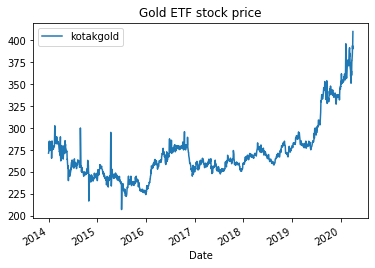

In [10]:
###axisgold['Open'].plot(label = 'axisgold', figsize= (15,7))
###bslgoldetf['Open'].plot(label = 'bslgoldetf')
###idbigold['Open'].plot(label = 'idbigold')
kotakgold['Open'].plot(label = 'kotakgold')
###qgoldhalf['Open'].plot(label = 'qgoldhalf')
###goldshare['Open'].plot(label = 'goldshare')
###goldbees['Open'].plot(label = 'goldbees')
plt.title('Gold ETF stock price')
plt.legend()

In [11]:
#We are going to predict the price of one Gold ETF below. Similarly all other predictions can also be made. Let us chose Axisgold ETF

In [12]:
#Modeling uing LSTM model


In [13]:
#data_1 = pd.read_csv('AXISGOLD.csv')
data_1 = pd.read_csv('KOTAKGOLD.csv')



In [14]:
# Select Adjusted close data
data = data_1[['Adj Close']]
print(data.shape)
data.head(4)

(1535, 1)


,Adj Close
0,272.364990
1,273.179993
2,276.750000
3,276.350006


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [16]:
print(data)

[[0.27561236]
 [0.28009902]
 [0.29975224]
 ...
 [0.90668862]
 [1.        ]
 [0.98761354]]


In [17]:
#Split data 80% training 20% testing

training_size=int(len(data)*0.8)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size],data[training_size:len(data)]

In [18]:
training_size,test_size

(1228, 307)

In [19]:
train_data

array([[0.27561236],
       [0.28009902],
       [0.29975224],
       ...,
       [0.29810078],
       [0.30250478],
       [0.29865115]])

In [20]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
print(x_train.shape), print(y_train.shape)

(1226, 1)
(1226,)


(None, None)

In [23]:
print(x_test.shape), print(y_test.shape)


(305, 1)
(305,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
#x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
#x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [25]:
x_train.shape, x_test.shape

((1226, 1), (305, 1))

In [26]:
x_train

array([[0.27561236],
       [0.28009902],
       [0.29975224],
       ...,
       [0.28571432],
       [0.29672451],
       [0.29810078]])

In [27]:
#Create models
#Create decision tree model
#modeltree = DecisionTreeRegressor()
#modeltree.fit(x_train, y_train)

#Create linear decision model
modellr = LinearRegression()
modellr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(modellr.coef_)))
# The Intercept
print('Intercept: ', modellr.intercept_)

Slope:  0.9911053209546755
Intercept:  0.0017852822147982061


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  from ipykernel import kernelapp as app


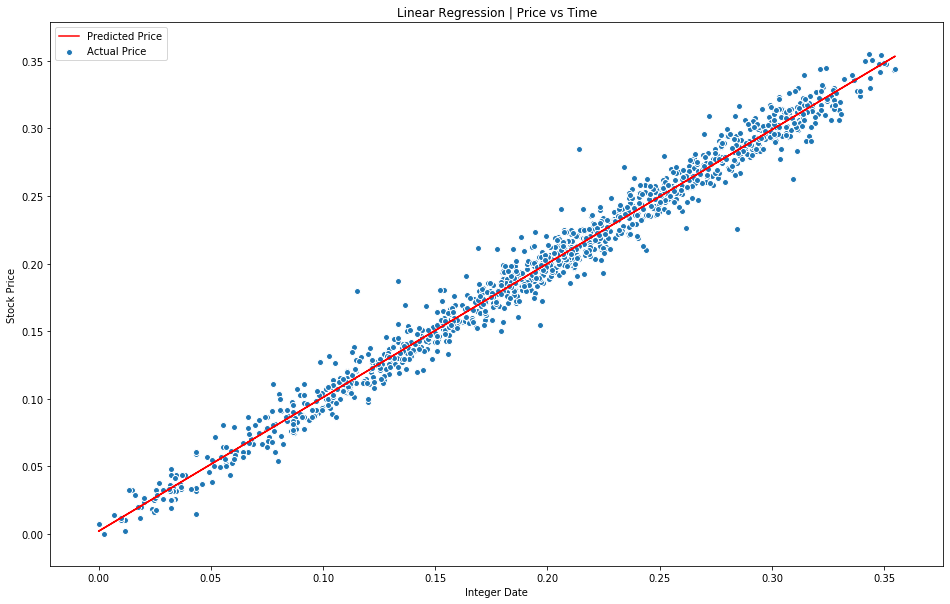

In [33]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(x_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(x_train, modellr.predict(x_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [34]:
# Create test arrays
x_test 

array([[0.30112851],
       [0.30883561],
       [0.31791898],
       [0.31296443],
       [0.30911096],
       [0.30745933],
       [0.31351497],
       [0.32975506],
       [0.32865397],
       [0.33030543],
       [0.33278279],
       [0.33828788],
       [0.33938897],
       [0.33305798],
       [0.32590143],
       [0.33305798],
       [0.33415906],
       [0.32562624],
       [0.32810343],
       [0.34792179],
       [0.35590424],
       [0.36498761],
       [0.36718962],
       [0.37324525],
       [0.37709871],
       [0.38177808],
       [0.38095234],
       [0.3630608 ],
       [0.36498761],
       [0.36801535],
       [0.36168452],
       [0.35948252],
       [0.37407098],
       [0.39223772],
       [0.39471507],
       [0.40572526],
       [0.4032479 ],
       [0.38370489],
       [0.38838425],
       [0.38205343],
       [0.38453062],
       [0.3834297 ],
       [0.3531517 ],
       [0.32837878],
       [0.33003024],
       [0.32314888],
       [0.34186616],
       [0.339

In [35]:
# Generate array with predicted values
y_train_pred = modellr.predict(x_train)
y_pred = modellr.predict(x_test)

In [36]:
# reshape input to be [samples, time steps, features] which is required for LSTM
y_train_pred =y_train_pred.reshape(y_train_pred.shape[0], 1)
y_pred = y_pred.reshape(y_pred.shape[0], 1)

In [37]:
y_train_pred=scaler.inverse_transform(y_train_pred)
y_pred=scaler.inverse_transform(y_pred)

y_pred

array([[276.83775761],
       [278.22529901],
       [279.86061674],
       [278.968628  ],
       [278.27487243],
       [277.97752268],
       [279.06774459],
       [281.99151738],
       [281.79328422],
       [282.09060372],
       [282.53661321],
       [283.52771853],
       [283.72595169],
       [282.58615638],
       [281.29773156],
       [282.58615638],
       [282.78438954],
       [281.24818839],
       [281.69416764],
       [285.26215284],
       [286.69926766],
       [288.33458539],
       [288.73102147],
       [289.82124337],
       [290.51499894],
       [291.35744452],
       [291.20878477],
       [287.98769247],
       [288.33458539],
       [288.87968121],
       [287.73991614],
       [287.34348007],
       [289.96990312],
       [293.24053858],
       [293.68654807],
       [295.66875871],
       [295.22274922],
       [291.70433743],
       [292.546783  ],
       [291.40701793],
       [291.85299718],
       [291.65479426],
       [286.203715  ],
       [281

In [38]:
#x_train =x_train.reshape(x_train.shape[0], 1)
#x_test =x_test.reshape(x_test.shape[0], 1)

In [39]:
print(y_test.shape) 
print(y_train_pred.shape)
print(y_train.shape)
print(y_pred.shape)

(305,)
(1226, 1)
(1226,)
(305, 1)


In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("Training Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_train,y_train_pred))))
print("Training Linear Regression Mean Squared error is {}".format(mean_squared_error(y_train,y_train_pred)))

print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test,y_pred))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(y_test,y_pred)))


Training Linear Regression Root Mean Squared error is:258.5088730077754
Training Linear Regression Mean Squared error is 66826.83742375013
Test Linear Regression Root Mean Squared error is:319.4725104791585
Test Linear Regression Mean Squared error is 102062.68495185603


In [109]:
y_train_pred

array([[272.24397477],
       [273.05172803],
       [276.58998128],
       ...,
       [274.06267481],
       [276.04488546],
       [276.29266179]])

In [111]:
train_predict

array([[272.75998],
       [273.5165 ],
       [276.7847 ],
       ...,
       [274.45807],
       [276.28632],
       [276.5131 ]], dtype=float32)

In [41]:
data_1 = pd.read_csv('KOTAKGOLD.csv')

In [42]:
data = data_1[['Adj Close']]

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [44]:
#Split data 80% training 20% testing

training_size=int(len(data)*0.8)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size],data[training_size:len(data)]

In [45]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [46]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [92]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout

In [49]:
from keras import backend as K
K.set_image_data_format('channels_last')  
keras.backend.image_data_format()  

'channels_last'

In [101]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(200,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [102]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 200, 50)           10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 50)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 200, 50)           20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200, 50)           0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 200, 50)           20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200, 50)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 200, 50)          

In [103]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 92ms/step - loss: 0.0336 - val_loss: 0.2341
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.1190
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0067 - val_loss: 0.1528
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.1368
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.1350
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.1243
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0785
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0069
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 6.6165e-04 - val_loss: 0.0461
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 4.9704e-04 - val_loss: 0.0025


In [104]:
import tensorflow as tf

In [105]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [106]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [107]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
print("Training Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_train,train_predict))))
print("Traning Linear Regression Mean Squared error is {}".format(mean_squared_error(y_train,train_predict)))



Training Linear Regression Root Mean Squared error is:259.2850368678318
Traning Linear Regression Mean Squared error is 67228.7303435529


In [108]:
### Test Data RMSE
print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test,test_predict))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(y_test,test_predict)))


Test Linear Regression Root Mean Squared error is:302.0999354434231
Test Linear Regression Mean Squared error is 91264.3709949204


### shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)-196:len(data)+100, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','Training', 'Test'])
plt.show()


In [58]:
len(data)

1535

In [59]:
#Predicting to next 1 day data using previous 7 days
x_input=data[len(data)-1:].reshape(1,-1)
x_input.shape

(1, 1)

In [60]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [61]:
len(temp_input)

1

In [62]:
temp_input

[0.9876135431511226]

In [63]:
from numpy import array

lst_output=[]
n_steps=1
i=0
while(i<7):
    
    if(len(temp_input)>1):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8174825]
2
1 day input [0.81748247]
1 day output [[0.7222689]]
2 day input [0.72226888]
2 day output [[0.6592852]]
3 day input [0.65928519]
3 day output [[0.6136674]]
4 day input [0.61366743]
4 day output [[0.5786799]]
5 day input [0.57867992]
5 day output [[0.5507626]]
6 day input [0.55076259]
6 day output [[0.5278318]]
[[0.8174824714660645], [0.7222688794136047], [0.6592851877212524], [0.6136674284934998], [0.5786799192428589], [0.5507625937461853], [0.5278317928314209]]


In [64]:
day_new=np.arange(1,len(lst_output)+1)
day_pred=np.arange(len(lst_output)+1,len(lst_output)+8)

In [65]:
import matplotlib.pyplot as plt

In [66]:
len(data)

1535

In [67]:
lst_output

[[0.8174824714660645],
 [0.7222688794136047],
 [0.6592851877212524],
 [0.6136674284934998],
 [0.5786799192428589],
 [0.5507625937461853],
 [0.5278317928314209]]

In [68]:
day_pred

array([ 8,  9, 10, 11, 12, 13, 14])

In [69]:
tx = scaler.inverse_transform(lst_output)

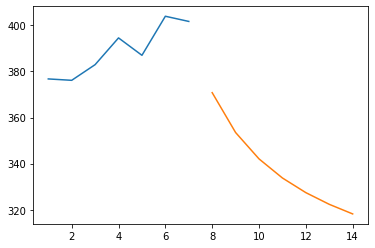

In [70]:
plt.plot(day_new,scaler.inverse_transform(data[len(data)-7:]))
plt.plot(day_pred,tx)

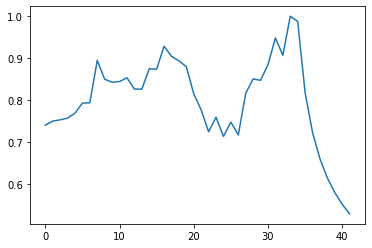

In [71]:
df3=data.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [72]:
df3=scaler.inverse_transform(df3).tolist()

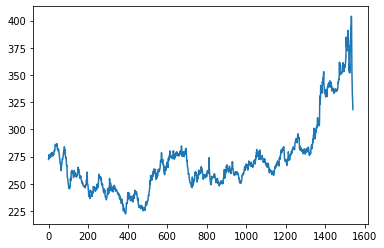

In [73]:
plt.plot(df3)